<a href="https://colab.research.google.com/github/renneruan/pytorch-handbook/blob/main/00_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.5.1+cu121


In [3]:
# We can have different kinds of Tensors
# https://pytorch.org/docs/stable/tensors.html
scalar = torch.tensor(7)
print(scalar.ndim) # Numbero of dimensions
print(scalar.item())

0
7


In [5]:
vector = torch.tensor([1, 2])
print(vector.ndim)
print(vector.shape)

1
torch.Size([2])


In [9]:
MATRIX = torch.tensor([[7,8],
                      [9,10]])
print(MATRIX.ndim)
print(MATRIX[1])
print(MATRIX.shape)

2
tensor([ 9, 10])
torch.Size([2, 2])


In [11]:
MATRIX = torch.tensor([[[7,8, 1],
                      [9,10, 5],
                       [0,1,2]]])
print(MATRIX.ndim)
print(MATRIX[0])
print(MATRIX.shape)

3
tensor([[ 7,  8,  1],
        [ 9, 10,  5],
        [ 0,  1,  2]])
torch.Size([1, 3, 3])


As convention, we must name Matrix or Tensors with Uppercase, and Scalars and Vector lowercase

### Random tensors
Neural Networds learn starting with random numbers, and they will adapt to better represent the data

In [14]:
random_tensor = torch.rand(3, 10)
print(random_tensor.ndim)
random_tensor

2


tensor([[0.2146, 0.7925, 0.1563, 0.3521, 0.0909, 0.3730, 0.1015, 0.5542, 0.0517,
         0.9895],
        [0.9440, 0.2208, 0.7545, 0.0633, 0.6791, 0.6013, 0.1426, 0.2415, 0.4169,
         0.0441],
        [0.4020, 0.0746, 0.4618, 0.7457, 0.4889, 0.7708, 0.7231, 0.2503, 0.9139,
         0.0926]])

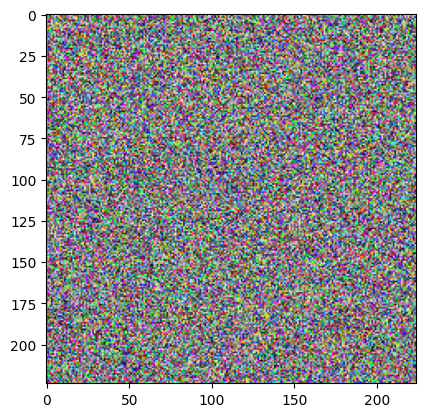

In [17]:
random_image = torch.rand(size=(3,224,224))
plt.imshow( random_image.permute(1, 2, 0))


In [19]:
zeros = torch.zeros(3,4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [21]:
ones = torch.ones(3,4)
print(ones.dtype)
ones

torch.float32


tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [28]:
stepped_array = torch.arange(start=0,end=100, step=7)
stepped_array

tensor([ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98])

In [27]:
zeros_like = torch.zeros_like(input=stepped_array)
zeros_like

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

*Datatypes*

Famous errors:
- Tensors not right datatype
- Tensors not right shape
- Tensors not on the right device

In [32]:
float_32_tensor = torch.tensor([1.3, 5.1, 9.0],
                               dtype=None,
                               device=None, # cuda or cpu
                               requires_grad=False) # track gradients or not
print(float_32_tensor.dtype)

torch.float32


In [34]:
float_16_tensor = float_32_tensor.type(torch.half)
float_16_tensor

tensor([1.2998, 5.1016, 9.0000], dtype=torch.float16)

In [36]:
float_64_tensor = float_32_tensor.type(torch.LongTensor)


In [37]:
print(float_16_tensor * float_32_tensor)
print(float_32_tensor * float_64_tensor)

tensor([ 1.6897, 26.0180, 81.0000])
tensor([ 1.3000, 25.5000, 81.0000])


In [40]:
float_32_tensor.device

device(type='cpu')

Tensor Operations

In [42]:
tensor = torch.tensor([1,2,3])

In [47]:
print(tensor + 10)
print(tensor * 10)
print(tensor - 10)

print(tensor.add(10))
print(tensor.mul(10))
print(tensor.sub(10))

tensor([11, 12, 13])
tensor([10, 20, 30])
tensor([-9, -8, -7])
tensor([11, 12, 13])
tensor([10, 20, 30])
tensor([-9, -8, -7])


In [55]:
tensor * tensor # Element wise

tensor([1, 4, 9])

In [57]:
tensor.matmul(tensor) # dot product

tensor(14)

In [62]:
# dot product
tensor1 = torch.rand(2,3)
print(tensor1)

tensor2 = torch.rand(3,4)
print(tensor2)

tensor1.matmul(tensor2)

tensor([[0.3318, 0.1275, 0.6118],
        [0.4583, 0.6504, 0.7648]])
tensor([[0.5028, 0.1377, 0.2493, 0.3091],
        [0.1593, 0.2829, 0.3875, 0.5934],
        [0.8472, 0.8483, 0.4819, 0.3366]])


tensor([[0.7054, 0.6007, 0.4269, 0.3841],
        [0.9819, 0.8958, 0.7348, 0.7850]])

Descritive methods

In [68]:
print(torch.min(tensor1))
print(tensor1.min())

print(torch.max(tensor1))
print(tensor1.max())

print(torch.mean(tensor1))
print(tensor1.mean())

print(torch.sum(tensor1))
print(tensor1.sum())

tensor(0.1275)
tensor(0.1275)
tensor(0.7648)
tensor(0.7648)
tensor(0.4907)
tensor(0.4907)
tensor(2.9445)
tensor(2.9445)


In [70]:
print(tensor1.argmin())

print(tensor1.argmax())

tensor(1)
tensor(5)


Reshaping, stacking, squeezing and unsqueezing
- Reshaping
- View
- Stacking
- Squeeze
- Unsqueeze
- Permute

In [81]:
x = torch.arange(1., 11.)
x

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [82]:
x_reshaped = x.reshape(10,1)
x_reshaped

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])

In [83]:
x_reshaped = x.reshape(5,2)
x_reshaped

tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [84]:
z = x.view(1,10)
z